In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from itertools import product



In [50]:
df = pd.read_csv(r"C:\Users\TPWODL\New folder_Content\TimeSeriesForecasting_End_To_End\data\raw\electricity demand dataset.csv")

In [51]:
df.head(5)

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


In [52]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43843    False
43844    False
43845    False
43846    False
43847    False
Length: 43848, dtype: bool

In [53]:
df.isnull().sum()

Timestamp       0
hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


In [56]:
df.shape

(43817, 9)

In [57]:
df.isnull().sum()

Timestamp      0
hour           0
dayofweek      0
month          0
year           0
dayofyear      0
Temperature    0
Humidity       0
Demand         0
dtype: int64

In [58]:
# Create datetime index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # If you have timestamp column
# Or use this if you need to create datetime from existing columns:
# df['Timestamp'] = pd.to_datetime(df['01-Jan-20'])

In [59]:
df = df.sort_values('Timestamp').reset_index(drop=True)
df.set_index('Timestamp', inplace=True)

In [60]:
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")


Dataset shape: (43817, 8)
Date range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00


In [61]:
df.head()

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,23.0,2.0,1.0,2020.0,1.0,3.000000,51.487121,2622.193016
2020-01-01,22.0,2.0,1.0,2020.0,1.0,3.000000,56.571654,3213.228194
2020-01-01,21.0,2.0,1.0,2020.0,1.0,3.000000,59.666195,3890.171574
2020-01-01,20.0,2.0,1.0,2020.0,1.0,3.835712,44.737649,4424.292539


In [69]:
df

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,23.0,2.0,1.0,2020.0,1.0,3.000000,51.487121,2622.193016
2020-01-01,22.0,2.0,1.0,2020.0,1.0,3.000000,56.571654,3213.228194
2020-01-01,21.0,2.0,1.0,2020.0,1.0,3.000000,59.666195,3890.171574
2020-01-01,20.0,2.0,1.0,2020.0,1.0,3.835712,44.737649,4424.292539
...,...,...,...,...,...,...,...,...
2024-12-31,2.0,1.0,12.0,2024.0,366.0,3.000000,55.076004,2431.538942
2024-12-31,1.0,1.0,12.0,2024.0,366.0,3.000000,79.536292,2654.477513
2024-12-31,0.0,1.0,12.0,2024.0,366.0,3.000000,74.124312,2722.480185


In [78]:
# Extract target variable (Energy Demand)
ts_data = df['Demand'].astype(float)
print(f"\nTime series shape: {ts_data.shape}")
print(f"Missing values: {ts_data.isna().sum()}")


Time series shape: (43817,)
Missing values: 0



--- TIME SERIES VISUALIZATION ---
✓ Time series plot saved as 'time_series_plot.png'


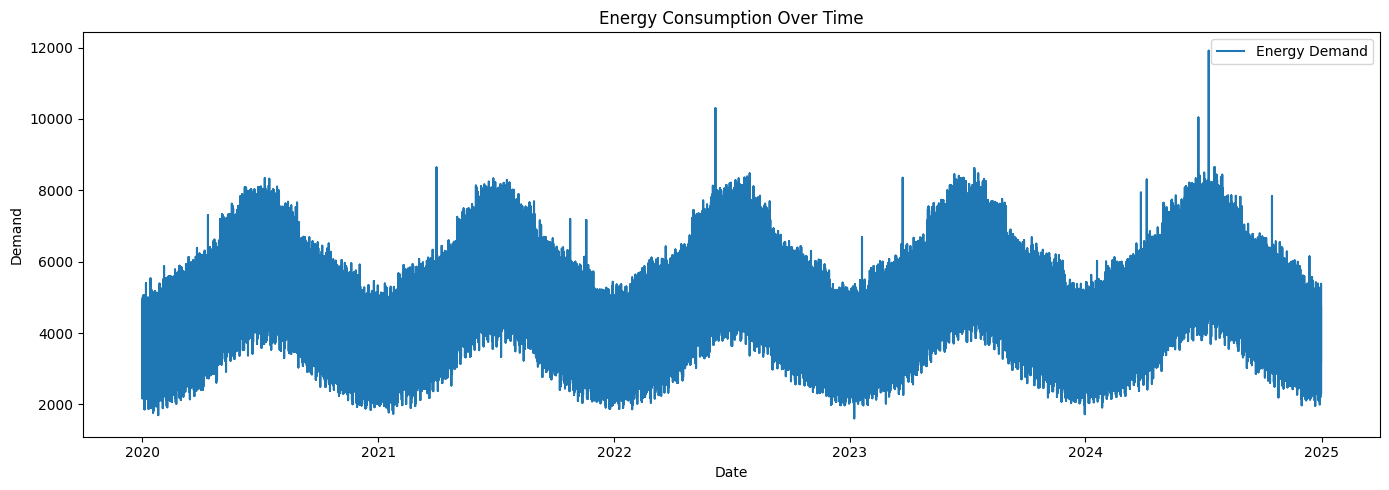

In [79]:
# ============ STEP 2: TIME SERIES VISUALIZATION ============
print("\n--- TIME SERIES VISUALIZATION ---")
plt.figure(figsize=(14, 5))
plt.plot(ts_data.index, ts_data.values, label='Energy Demand')
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.tight_layout()
plt.savefig('time_series_plot.png')
print("✓ Time series plot saved as 'time_series_plot.png'")
plt.show()

In [80]:
# ============ STEP 3: STATIONARITY CHECK (ADF Test) ============
print("\n--- STATIONARITY CHECK (ADF Test) ---")
def adf_test(timeseries, name=''):
    result = adfuller(timeseries, autolag='AIC')
    print(f"\nADF Test Results for {name}:")
    print(f"  ADF Statistic: {result[0]:.6f}")
    print(f"  p-value: {result[1]:.6f}")
    print(f"  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.3f}")
    
    if result[1] <= 0.05:
        print(f"  ✓ Series is STATIONARY (p-value = {result[1]:.6f})")
        return True
    else:
        print(f"  ✗ Series is NON-STATIONARY (p-value = {result[1]:.6f})")
        return False

is_stationary = adf_test(ts_data, 'Original Series')


--- STATIONARITY CHECK (ADF Test) ---

ADF Test Results for Original Series:
  ADF Statistic: -5.774268
  p-value: 0.000001
  Critical Values:
    1%: -3.430
    5%: -2.862
    10%: -2.567
  ✓ Series is STATIONARY (p-value = 0.000001)


In [81]:
# If not stationary, apply differencing
if not is_stationary:
    print("\n--- APPLYING DIFFERENCING ---")
    ts_data_diff = ts_data.diff().dropna()
    is_stationary_diff = adf_test(ts_data_diff, 'Differenced Series')
    d = 1
else:
    d = 0


--- ACF/PACF PLOTS ---
✓ ACF/PACF plots saved as 'acf_pacf_plots.png'


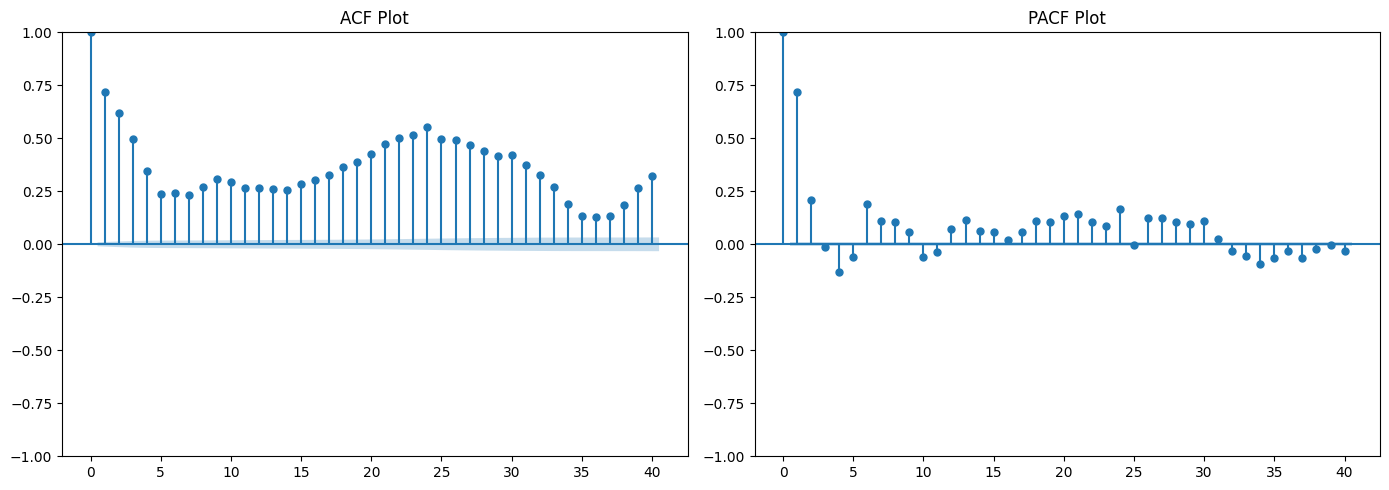

In [82]:
# ============ STEP 4: ACF AND PACF PLOTS ============
print("\n--- ACF/PACF PLOTS ---")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(ts_data.dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF Plot')

plot_pacf(ts_data.dropna(), lags=40, ax=axes[1], method='ywm')
axes[1].set_title('PACF Plot')

plt.tight_layout()
plt.savefig('acf_pacf_plots.png')
print("✓ ACF/PACF plots saved as 'acf_pacf_plots.png'")
plt.show()

In [83]:
# ============ STEP 5: SARIMAX MODEL TRAINING ============
print("\n--- TRAINING SARIMAX MODEL ---")
print("Using SARIMAX parameters:")
print("  p=1, d=0, q=0  (ARIMA order)")
print("  P=1, D=0, Q=1, s=24 (Seasonal order - 24 hours)")


--- TRAINING SARIMAX MODEL ---
Using SARIMAX parameters:
  p=1, d=0, q=0  (ARIMA order)
  P=1, D=0, Q=1, s=24 (Seasonal order - 24 hours)


In [86]:
ts_data

Timestamp
2020-01-01    2457.119872
2020-01-01    2622.193016
2020-01-01    3213.228194
2020-01-01    3890.171574
2020-01-01    4424.292539
                 ...     
2024-12-31    2431.538942
2024-12-31    2654.477513
2024-12-31    2722.480185
2024-12-31    4813.689951
2024-12-31    3219.023339
Name: Demand, Length: 43817, dtype: float64

In [88]:
# ============ STEP 5: AUTO ARIMA PARAMETER SELECTION ============
print("\n--- ARIMA PARAMETER SELECTION ---")
print("Testing multiple ARIMA combinations...")

# Test different ARIMA parameters
p_range = range(0, 4)
q_range = range(0, 4)
best_aic = np.inf
best_params = None
results_list = []

for p in p_range:
    for q in q_range:
        try:
            model = ARIMA(ts_data, order=(p, d, q))
            results = model.fit()
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (p, d, q)
            
            results_list.append({
                'ARIMA Order': f'({p},{d},{q})',
                'AIC': results.aic,
                'BIC': results.bic
            })
        except:
            pass

# Display results
results_comparison = pd.DataFrame(results_list).sort_values('AIC')
print("\nTop 10 ARIMA Models by AIC:")
print(results_comparison.head(10).to_string())

print(f"\n✓ Best ARIMA Order: {best_params}")
print(f"  Lowest AIC: {best_aic:.2f}")

p, d, q = best_params


--- ARIMA PARAMETER SELECTION ---
Testing multiple ARIMA combinations...

Top 10 ARIMA Models by AIC:
   ARIMA Order            AIC            BIC
15     (3,0,3)  719811.061200  719880.563418
14     (3,0,2)  723487.643689  723548.458129
11     (2,0,3)  723914.786278  723975.600718
7      (1,0,3)  724252.532034  724304.658697
10     (2,0,2)  724792.743755  724844.870418
6      (1,0,2)  725591.236110  725634.674996
13     (3,0,1)  726100.085512  726152.212175
12     (3,0,0)  726102.906337  726146.345222
9      (2,0,1)  726107.497319  726150.936205
8      (2,0,0)  726109.247211  726143.998320

✓ Best ARIMA Order: (3, 0, 3)
  Lowest AIC: 719811.06


In [89]:
# ============ STEP 6: ARIMA MODEL TRAINING ============
print("\n--- TRAINING ARIMA MODEL ---")
print(f"Using ARIMA{best_params} (Auto-selected based on AIC)")

try:
    print("\nFitting ARIMA model...")
    model = ARIMA(ts_data, order=(p, d, q))
    results = model.fit()
    
    print("✓ Model fitted successfully!")
    print("\nModel Summary:")
    print(results.summary())
    
except Exception as e:
    print(f"Error fitting ARIMA: {e}")
    print("Using default ARIMA(1,0,1)...")




--- TRAINING ARIMA MODEL ---
Using ARIMA(3, 0, 3) (Auto-selected based on AIC)

Fitting ARIMA model...
✓ Model fitted successfully!

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                43817
Model:                 ARIMA(3, 0, 3)   Log Likelihood             -359897.531
Date:                Thu, 16 Oct 2025   AIC                         719811.061
Time:                        03:40:45   BIC                         719880.563
Sample:                             0   HQIC                        719832.967
                              - 43817                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5000.5797    168.481     29.680      0.000    467

In [90]:
# ============ STEP 7: IN-SAMPLE PREDICTIONS AND DIAGNOSTICS ============
print("\n--- IN-SAMPLE DIAGNOSTICS ---")

fitted_values = results.fittedvalues
residuals = results.resid

rmse_train = np.sqrt(np.mean(residuals**2))
mae_train = np.mean(np.abs(residuals))
mape_train = np.mean(np.abs(residuals / ts_data)) * 100

print(f"RMSE (Training): {rmse_train:.4f}")
print(f"MAE (Training): {mae_train:.4f}")
print(f"MAPE (Training): {mape_train:.4f}%")


--- IN-SAMPLE DIAGNOSTICS ---
RMSE (Training): 889.8384
MAE (Training): 708.0627
MAPE (Training): 16.2551%


In [91]:
# ============ STEP 8: FORECAST NEXT 30 DAYS ============
print("\n--- FORECASTING NEXT 30 DAYS ---")

# For hourly data, 30 days = 30 * 24 = 720 hours
forecast_steps = 30 * 24  # 720 hours for 30 days

# Get forecast with confidence intervals
forecast_result = results.get_forecast(steps=forecast_steps)
forecast_values = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int(alpha=0.05)

print(f"Forecast horizon: {forecast_steps} hours (30 days)")
print(f"\nForecast Statistics:")
print(f"  Mean: {forecast_values.mean():.2f}")
print(f"  Std Dev: {forecast_values.std():.2f}")
print(f"  Min: {forecast_values.min():.2f}")
print(f"  Max: {forecast_values.max():.2f}")



--- FORECASTING NEXT 30 DAYS ---
Forecast horizon: 720 hours (30 days)

Forecast Statistics:
  Mean: 4124.08
  Std Dev: 77.29
  Min: 3837.46
  Max: 4310.84


In [92]:
# ============ STEP 9: CREATE FORECAST DATAFRAME ============
print("\n--- CREATING FORECAST DATAFRAME ---")

# Generate future dates
last_date = ts_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast_values.values,
    'Lower_CI_95': forecast_ci.iloc[:, 0].values,
    'Upper_CI_95': forecast_ci.iloc[:, 1].values
})

# Add upper and lower bounds
forecast_df['CI_Width'] = forecast_df['Upper_CI_95'] - forecast_df['Lower_CI_95']

print("\nForecast DataFrame (First 10 rows):")
print(forecast_df.head(10))

print("\nForecast DataFrame (Last 10 rows):")
print(forecast_df.tail(10))

# Save forecast to CSV
forecast_df.to_csv('energy_forecast_30days_arima.csv', index=False)
print("\n✓ Forecast saved to 'energy_forecast_30days_arima.csv'")


--- CREATING FORECAST DATAFRAME ---

Forecast DataFrame (First 10 rows):
                 Date     Forecast  Lower_CI_95  Upper_CI_95     CI_Width
0 2024-12-31 01:00:00  4310.837180  2455.206445  6166.467914  3711.261469
1 2024-12-31 02:00:00  4130.980559  2128.968358  6132.992760  4004.024402
2 2024-12-31 03:00:00  3958.134263  1756.370961  6159.897566  4403.526605
3 2024-12-31 04:00:00  3855.268961  1548.147079  6162.390843  4614.243764
4 2024-12-31 05:00:00  3837.456610  1512.227723  6162.685498  4650.457775
5 2024-12-31 06:00:00  3882.537890  1556.167640  6208.908139  4652.740499
6 2024-12-31 07:00:00  3952.192811  1609.725180  6294.660443  4684.935263
7 2024-12-31 08:00:00  4011.914037  1651.151220  6372.676853  4721.525633
8 2024-12-31 09:00:00  4042.722779  1674.693489  6410.752069  4736.058580
9 2024-12-31 10:00:00  4043.026746  1674.747752  6411.305739  4736.557988

Forecast DataFrame (Last 10 rows):
                   Date     Forecast  Lower_CI_95  Upper_CI_95     CI_Width


In [93]:
forecast_df

,Date,Forecast,Lower_CI_95,Upper_CI_95,CI_Width
0,2024-12-31 01:00:00,4310.837180,2455.206445,6166.467914,3711.261469
1,2024-12-31 02:00:00,4130.980559,2128.968358,6132.992760,4004.024402
2,2024-12-31 03:00:00,3958.134263,1756.370961,6159.897566,4403.526605
3,2024-12-31 04:00:00,3855.268961,1548.147079,6162.390843,4614.243764
4,2024-12-31 05:00:00,3837.456610,1512.227723,6162.685498,4650.457775
...,...,...,...,...,...
715,2025-01-29 20:00:00,4247.439281,1791.046108,6703.832455,4912.786347
716,2025-01-29 21:00:00,4247.753105,1791.281488,6704.224723,4912.943235
717,2025-01-29 22:00:00,4248.066799,1791.516805,6704.616793,4913.099988
718,2025-01-29 23:00:00,4248.380361,1791.752059,6705.008664,4913.256605



--- CREATING VISUALIZATIONS ---
✓ Forecast visualization saved as 'arima_forecast_30days.png'


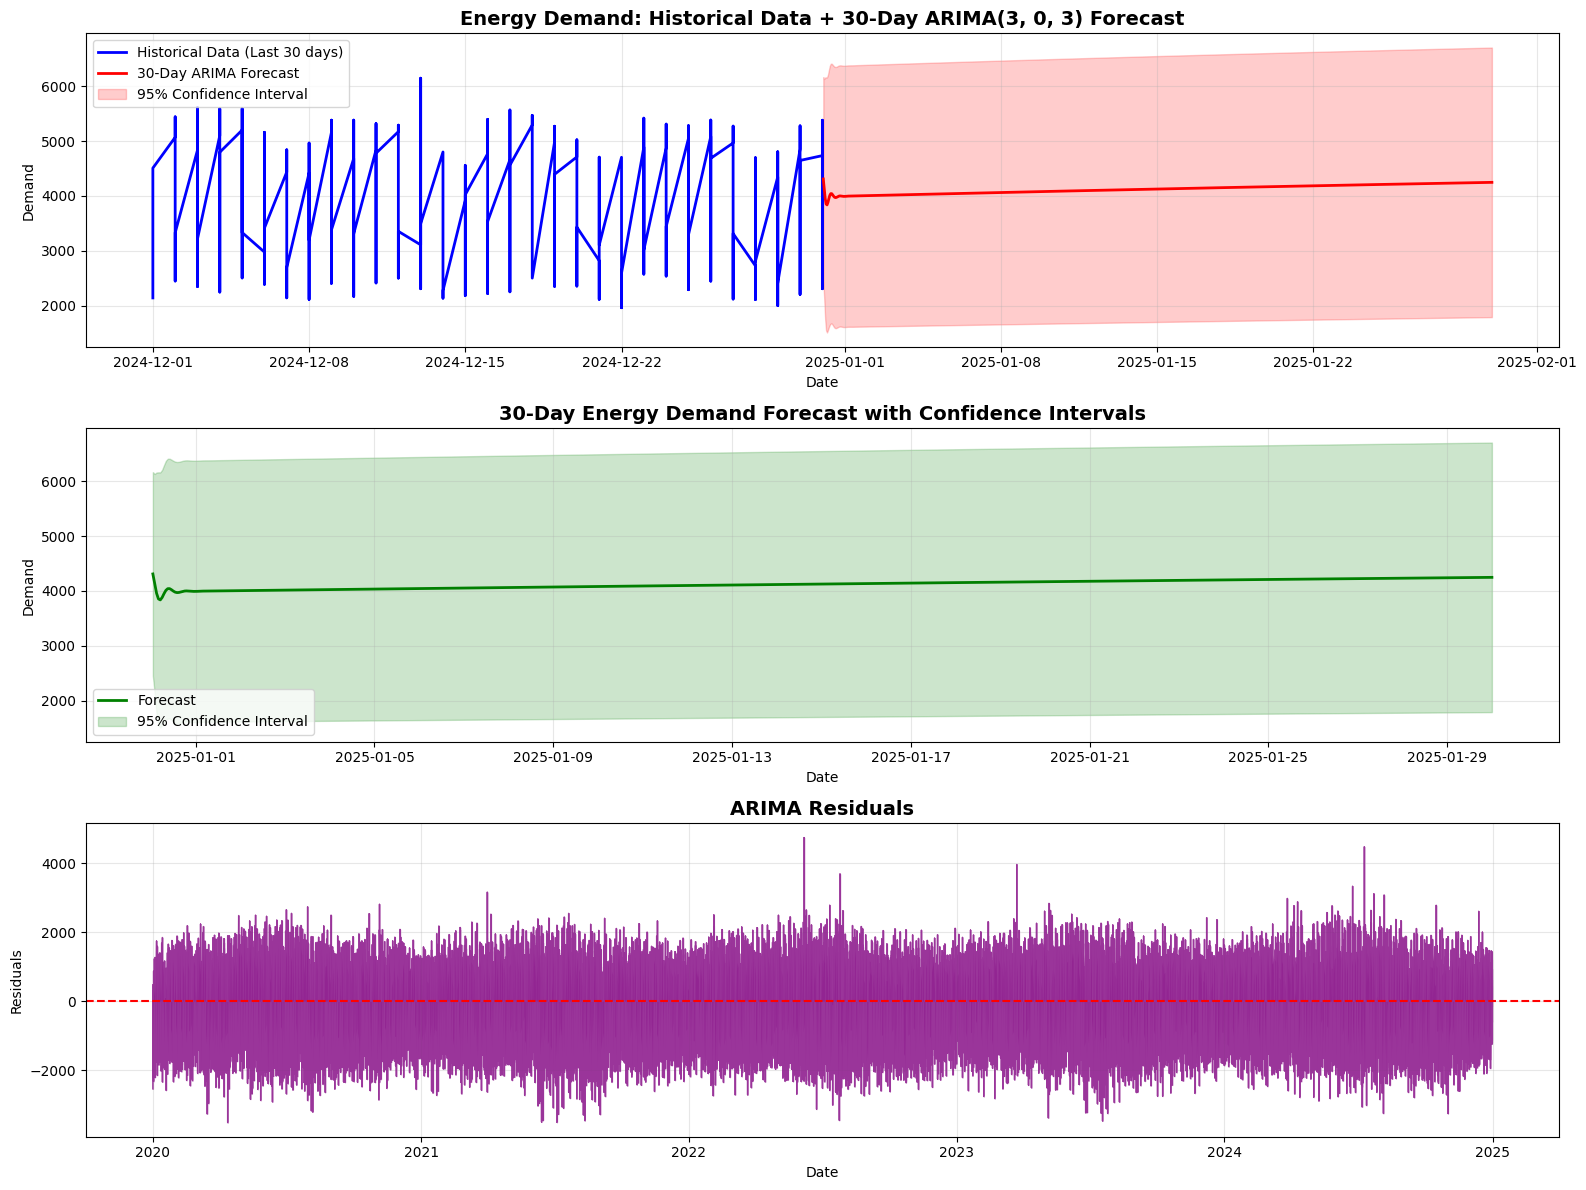

In [94]:
# ============ STEP 10: VISUALIZATION ============
print("\n--- CREATING VISUALIZATIONS ---")

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Full historical + forecast
ax1 = axes[0]
ax1.plot(ts_data.index[-720:], ts_data.values[-720:], 'b-', label='Historical Data (Last 30 days)', linewidth=2)
ax1.plot(forecast_df['Date'], forecast_df['Forecast'], 'r-', label='30-Day ARIMA Forecast', linewidth=2)
ax1.fill_between(forecast_df['Date'], forecast_df['Lower_CI_95'], forecast_df['Upper_CI_95'], 
                  color='red', alpha=0.2, label='95% Confidence Interval')
ax1.set_title(f'Energy Demand: Historical Data + 30-Day ARIMA{best_params} Forecast', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Only forecast with confidence intervals
ax2 = axes[1]
ax2.plot(forecast_df['Date'], forecast_df['Forecast'], 'g-', label='Forecast', linewidth=2)
ax2.fill_between(forecast_df['Date'], forecast_df['Lower_CI_95'], forecast_df['Upper_CI_95'], 
                  color='green', alpha=0.2, label='95% Confidence Interval')
ax2.set_title('30-Day Energy Demand Forecast with Confidence Intervals', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Demand')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Residuals analysis
ax3 = axes[2]
ax3.plot(residuals.index, residuals.values, 'purple', linewidth=1, alpha=0.7)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.fill_between(residuals.index, residuals.values, 0, alpha=0.3, color='purple')
ax3.set_title('ARIMA Residuals', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Residuals')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('arima_forecast_30days.png', dpi=300)
print("✓ Forecast visualization saved as 'arima_forecast_30days.png'")
plt.show()


--- MODEL DIAGNOSTICS ---
✓ Diagnostics plot saved as 'arima_diagnostics.png'


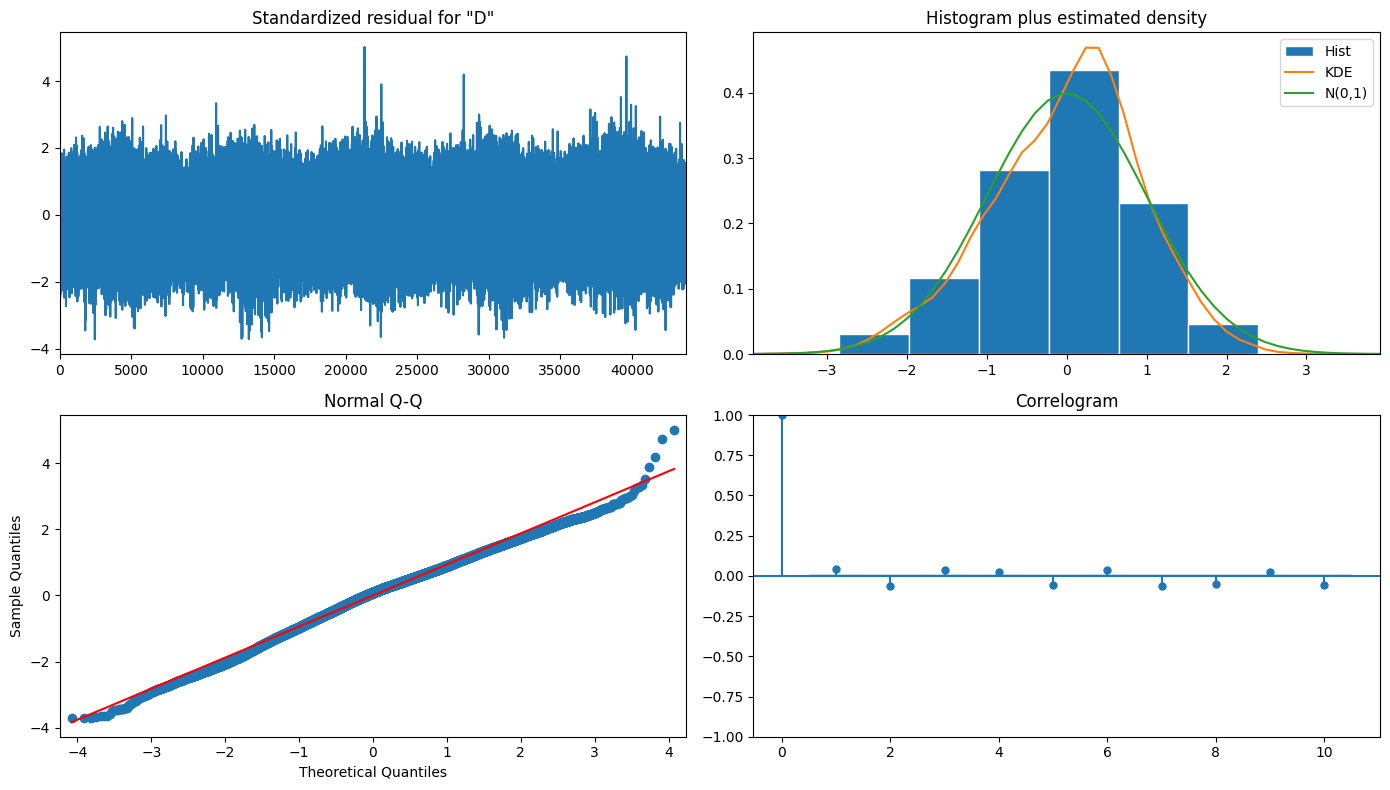

In [96]:
# ============ STEP 11: MODEL DIAGNOSTICS ============
print("\n--- MODEL DIAGNOSTICS ---")
fig = results.plot_diagnostics(figsize=(14, 8))
plt.tight_layout()
plt.savefig('arima_diagnostics.png', dpi=300)
print("✓ Diagnostics plot saved as 'arima_diagnostics.png'")
plt.show()

In [98]:
# ============ STEP 12: DAILY AGGREGATES ============
print("\n--- DAILY FORECAST SUMMARY ---")

forecast_df['Day'] = forecast_df['Date'].dt.date
daily_forecast = forecast_df.groupby('Day').agg({
    'Forecast': ['mean', 'min', 'max', 'sum'],
    'Lower_CI_95': 'mean',
    'Upper_CI_95': 'mean'
}).round(2)

daily_forecast.columns = ['Mean_Demand', 'Min_Demand', 'Max_Demand', 'Total_Demand', 'Lower_CI', 'Upper_CI']

print("\nDaily Forecast Summary (First 10 days):")
print(daily_forecast.head(10))

# Save daily summary
daily_forecast.to_csv('energy_forecast_daily_summary_arima.csv')
print("\n✓ Daily summary saved to 'energy_forecast_daily_summary_arima.csv'")


--- DAILY FORECAST SUMMARY ---

Daily Forecast Summary (First 10 days):
            Mean_Demand  Min_Demand  Max_Demand  Total_Demand  Lower_CI  \
Day                                                                       
2024-12-31      3996.89     3837.46     4310.84      91928.46   1675.69   
2025-01-01      4000.33     3992.83     4005.27      96007.92   1616.89   
2025-01-02      4010.42     4005.68     4015.16      96250.06   1623.60   
2025-01-03      4020.27     4015.57     4024.96      96486.55   1630.14   
2025-01-04      4030.03     4025.37     4034.67      96720.71   1636.65   
2025-01-05      4039.69     4035.08     4044.29      96952.54   1643.13   
2025-01-06      4049.25     4044.69     4053.81      97182.07   1649.59   
2025-01-07      4058.72     4054.20     4063.23      97409.31   1656.01   
2025-01-08      4068.10     4063.62     4072.56      97634.28   1662.40   
2025-01-09      4077.38     4072.94     4081.79      97857.02   1668.77   

            Upper_CI  
Day

In [100]:
# ============ STEP 13: SUMMARY REPORT ============
print("\n" + "="*70)
print("ARIMA FORECAST SUMMARY - NEXT 30 DAYS")
print("="*70)
print(f"\nModel Configuration:")
print(f"  ARIMA Order: {best_params}")
print(f"  Series is STATIONARY (d={d})")
print(f"  AIC Score: {best_aic:.2f}")
print(f"\nTraining Performance:")
print(f"  RMSE: {rmse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  MAPE: {mape_train:.4f}%")
print(f"\n30-Day Forecast Statistics:")
print(f"  Average Daily Demand: {daily_forecast['Mean_Demand'].mean():.2f}")
print(f"  Total 30-Day Demand: {daily_forecast['Total_Demand'].sum():.2f}")
print(f"  Forecast Range: {forecast_values.min():.2f} - {forecast_values.max():.2f}")
print(f"  Average Confidence Interval Width: {forecast_df['CI_Width'].mean():.2f}")

print("\n" + "="*70)
print("✓ ARIMA 30-Day Forecast Completed Successfully!")
print("="*70)
print("\nGenerated Files:")
print("  1. energy_forecast_30days_arima.csv - Hourly predictions with CI")
print("  2. energy_forecast_daily_summary_arima.csv - Daily aggregates")
print("  3. arima_forecast_30days.png - Forecast visualization")
print("  4. arima_diagnostics.png - Model diagnostics")
print("  5. time_series_plot.png - Original time series")
print("  6. acf_pacf_plots.png - ACF/PACF analysis")


ARIMA FORECAST SUMMARY - NEXT 30 DAYS

Model Configuration:
  ARIMA Order: (3, 0, 3)
  Series is STATIONARY (d=0)
  AIC Score: 719811.06

Training Performance:
  RMSE: 889.8384
  MAE: 708.0627
  MAPE: 16.2551%

30-Day Forecast Statistics:
  Average Daily Demand: 4127.76
  Total 30-Day Demand: 2969334.89
  Forecast Range: 3837.46 - 4310.84
  Average Confidence Interval Width: 4839.57

✓ ARIMA 30-Day Forecast Completed Successfully!

Generated Files:
  1. energy_forecast_30days_arima.csv - Hourly predictions with CI
  2. energy_forecast_daily_summary_arima.csv - Daily aggregates
  3. arima_forecast_30days.png - Forecast visualization
  4. arima_diagnostics.png - Model diagnostics
  5. time_series_plot.png - Original time series
  6. acf_pacf_plots.png - ACF/PACF analysis
